In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [2]:
pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [4]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


In [5]:
from google.colab import files
uploaded = files.upload()

Saving India.csv to India.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['India.csv']))
df["DailyChangeConfirmedCases"] = df['Confirmed Cases'].diff().fillna(0)
df.head()
total_days=df.shape[0]
print('total days:',total_days)
# India Dataset is now stored in a Pandas Dataframe df

total days: 322


In [7]:
list_of_cases=list(df['DailyChangeConfirmedCases'])
print(list_of_cases)
#list_of_cases is a list which stores the daily confirmed cases 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 23.0, 2.0, 1.0, 3.0, 5.0, 4.0, 13.0, 6.0, 11.0, 9.0, 20.0, 11.0, 6.0, 23.0, 14.0, 38.0, 50.0, 86.0, 66.0, 103.0, 37.0, 121.0, 70.0, 160.0, 100.0, 37.0, 227.0, 146.0, 601.0, 545.0, 24.0, 515.0, 506.0, 1190.0, 533.0, 605.0, 809.0, 873.0, 848.0, 759.0, 1248.0, 1034.0, 835.0, 1108.0, 922.0, 1370.0, 1893.0, 924.0, 1541.0, 1290.0, 1707.0, 1453.0, 1753.0, 1607.0, 1561.0, 1873.0, 1738.0, 1801.0, 2394.0, 2442.0, 2806.0, 3932.0, 2963.0, 3587.0, 3364.0, 3344.0, 3113.0, 4353.0, 3607.0, 3524.0, 3763.0, 3942.0, 3787.0, 4864.0, 5050.0, 4630.0, 6147.0, 5553.0, 6198.0, 6568.0, 6629.0, 7113.0, 6414.0, 5843.0, 7293.0, 7300.0, 8105.0, 8336.0, 8782.0, 7761.0, 8821.0, 9633.0, 9889.0, 9471.0, 10438.0, 10864.0, 8442.0, 10218.0, 10459.0, 10930.0, 11458.0, 11929.0, 11502.0, 10667.0, 10974.0, 12881.0, 135

In [8]:
n_steps=20  #takes into account last 20 days' cases to predict next day's number of cases.
X,y=prepare_data(list_of_cases, n_steps)
#print(X)
print(len(y))
#number of training example records fed is 302

302


In [9]:
#The LSTM input layer must be 3D - samples(records), time steps, and features. 
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(302, 20, 1)

In [10]:
# define model. 2 LSTM layers, followed by a dense layer or FC layer that gives 1 output.
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
10/10 [==============================] - 3s 22ms/step - loss: 1195020898.9091
Epoch 2/300
10/10 [==============================] - 0s 21ms/step - loss: 793455749.8182
Epoch 3/300
10/10 [==============================] - 0s 20ms/step - loss: 515334551.2727
Epoch 4/300
10/10 [==============================] - 0s 21ms/step - loss: 183586171.6364
Epoch 5/300
10/10 [==============================] - 0s 22ms/step - loss: 195594091.6364
Epoch 6/300
10/10 [==============================] - 0s 20ms/step - loss: 218306501.8182
Epoch 7/300
10/10 [==============================] - 0s 20ms/step - loss: 341324695.2727
Epoch 8/300
10/10 [==============================] - 0s 24ms/step - loss: 171762234.1818
Epoch 9/300
10/10 [==============================] - 0s 20ms/step - loss: 122350203.6364
Epoch 10/300
10/10 [==============================] - 0s 18ms/step - loss: 100727472.7273
Epoch 11/300
10/10 [==============================] - 0s 18ms/step - loss: 81976881.4545
Epoch 12/300
10/10 

In [11]:
# We will predict cases for next one day (lookback days=20)
x_input=list_of_cases[len(list_of_cases)-20:len(list_of_cases)]
x_input=np.array(x_input)
n_features=1
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print('Input given:',x_input)
print('Predicted Cases',yhat)
#print(type(yhat))

Input given: [[[45882.]
  [46232.]
  [45209.]
  [44059.]
  [37975.]
  [44376.]
  [44489.]
  [43082.]
  [41322.]
  [41810.]
  [38772.]
  [31118.]
  [36604.]
  [35551.]
  [36595.]
  [36652.]
  [36011.]
  [32981.]
  [26567.]
  [32080.]]]
Predicted Cases [[30820.408]]


In [22]:
# demonstrate prediction for next 10 days
x_input=list_of_cases[len(list_of_cases)-20:len(list_of_cases)]
x_input=np.array(x_input)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if (len(temp_input)>20):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

#print(lst_output)

[30820.408]
1 day output [[28039.262]]
2 day output [[27128.832]]
3 day output [[27346.344]]
4 day output [[27534.3]]
5 day output [[27050.656]]
6 day output [[25494.773]]
7 day output [[23731.414]]
8 day output [[22365.756]]
9 day output [[21192.77]]


In [15]:
import matplotlib.pyplot as plt

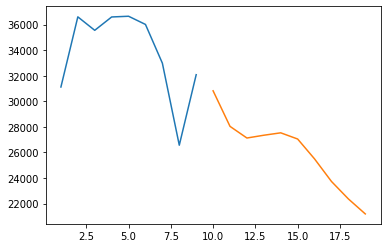

In [20]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,list_of_cases[len(list_of_cases)-9:len(list_of_cases)])
plt.plot(day_pred,lst_output)